In [160]:
%matplotlib inline
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import numpy as np


import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
import matplotlib.pyplot as pyplot

In [161]:
Top_Men = pd.read_csv("Men_TopTen_1999-2017.csv")

In [162]:
Top_Men.head(5)

,RANK,MARK,COMPETITOR,DOB,NAT,POS,VENUE,DATE1,DATE2
0,1,02:05:42,Khalid KHANNOUCHI,1971,MAR,1,"Chicago, IL",1999,1999
1,2,02:06:16,Moses TANUI,1965,KEN,2,"Chicago, IL",1999,1999
2,3,02:06:33,Gert THYS,1971,RSA,1,Tokyo,1999,1999
3,4,02:06:44,Josephat KIPRONO,1973,KEN,1,Berlin,1999,1999
4,5,02:06:47,Fred Kiprop KIPTUM,1974,KEN,1,Amsterdam,1999,1999


In [163]:
Top_Men.dtypes

RANK           int64
MARK          object
COMPETITOR    object
DOB            int64
NAT           object
POS           object
VENUE         object
DATE1          int64
DATE2          int64
dtype: object

In [164]:
Top_Men = Top_Men.set_index('DATE2')
Top_Men.head()

,RANK,MARK,COMPETITOR,DOB,NAT,POS,VENUE,DATE1
DATE2,,,,,,,,
1999,1,02:05:42,Khalid KHANNOUCHI,1971,MAR,1,"Chicago, IL",1999
1999,2,02:06:16,Moses TANUI,1965,KEN,2,"Chicago, IL",1999
1999,3,02:06:33,Gert THYS,1971,RSA,1,Tokyo,1999
1999,4,02:06:44,Josephat KIPRONO,1973,KEN,1,Berlin,1999
1999,5,02:06:47,Fred Kiprop KIPTUM,1974,KEN,1,Amsterdam,1999


In [165]:
Top_Men.shape

(190, 8)

In [166]:
Top_Men.dtypes

RANK           int64
MARK          object
COMPETITOR    object
DOB            int64
NAT           object
POS           object
VENUE         object
DATE1          int64
dtype: object

In [178]:
Top_Men['Difference'] = Top_Men['DATE1']-Top_Men['DOB']

In [179]:
Top_Men.head()  #.loc[2017]

,RANK,MARK,COMPETITOR,DOB,NAT,POS,VENUE,DATE1,Difference,30plus,30minus
DATE2,,,,,,,,,,,
1999,1,02:05:42,Khalid KHANNOUCHI,1971,MAR,1,"Chicago, IL",1999,28,False,True
1999,2,02:06:16,Moses TANUI,1965,KEN,2,"Chicago, IL",1999,34,True,False
1999,3,02:06:33,Gert THYS,1971,RSA,1,Tokyo,1999,28,False,True
1999,4,02:06:44,Josephat KIPRONO,1973,KEN,1,Berlin,1999,26,False,True
1999,5,02:06:47,Fred Kiprop KIPTUM,1974,KEN,1,Amsterdam,1999,25,False,True


In [180]:
Top_Men.dtypes

RANK           int64
MARK          object
COMPETITOR    object
DOB            int64
NAT           object
POS           object
VENUE         object
DATE1          int64
Difference     int64
30plus          bool
30minus         bool
dtype: object

In [170]:
Top_Men['Difference'].mean()

27.952631578947368

In [171]:
Top_Men['30plus'] = Top_Men['Difference'] > 29

In [172]:
Top_Men['30plus'].sum()

70

In [173]:
#Top_Men['30minus'].sum()

In [174]:
Top_Men['30minus'] = Top_Men['Difference'] < 30

In [175]:
Top_Men.head()

,RANK,MARK,COMPETITOR,DOB,NAT,POS,VENUE,DATE1,Difference,30plus,30minus
DATE2,,,,,,,,,,,
1999,1,02:05:42,Khalid KHANNOUCHI,1971,MAR,1,"Chicago, IL",1999,28,False,True
1999,2,02:06:16,Moses TANUI,1965,KEN,2,"Chicago, IL",1999,34,True,False
1999,3,02:06:33,Gert THYS,1971,RSA,1,Tokyo,1999,28,False,True
1999,4,02:06:44,Josephat KIPRONO,1973,KEN,1,Berlin,1999,26,False,True
1999,5,02:06:47,Fred Kiprop KIPTUM,1974,KEN,1,Amsterdam,1999,25,False,True


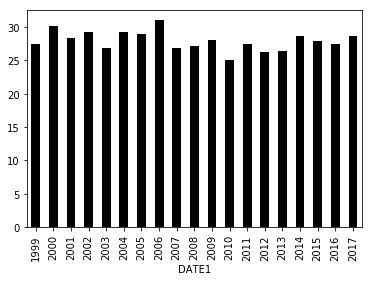

In [176]:
Top_Men.groupby('DATE1').Difference.mean().plot(kind='bar', color='black')

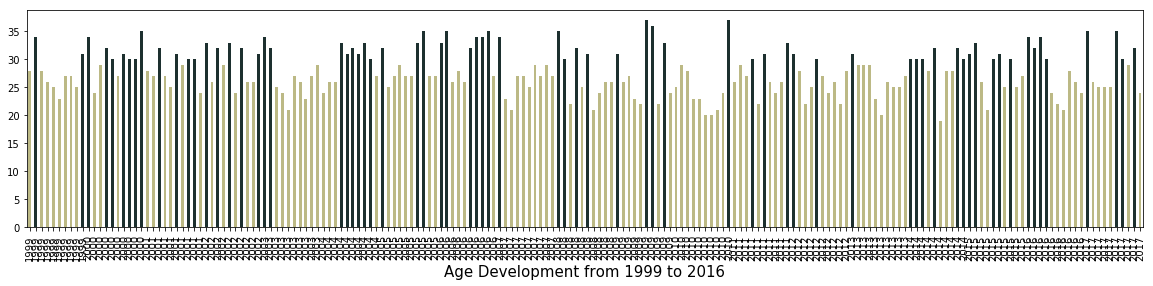

In [181]:
colors = {
    True:'#1D302F',
    False:'#bcb985'
}
colorlist = [colors[x] for x in Top_Men['30plus']]

Top_Men['Difference'].plot(kind='bar', figsize=(20, 4), color=[colorlist])
plt.xlabel('Age Development from 1999 to 2016', fontsize=15)
plt.savefig("Age_Men_allYears.pdf")
#plt.savefig("Top_Men_Difference_Color.pdf")